# Animal Shelter EDA

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Reading the CSVs

In [ ]:
df_intakes = pd.read_csv('../raw_data/Austin_Animal_Center_Intakes.csv', parse_dates=['DateTime'])
df_outcomes = pd.read_csv('../raw_data/Austin_Animal_Center_Outcomes.csv', parse_dates=['DateTime'])
df_straymap = pd.read_csv('../raw_data/Austin_Animal_Center_Stray_Map.csv')

#### Table sizes

In [ ]:
print(df_intakes.shape)
print(df_outcomes.shape)
print(df_straymap.shape)

(124120, 12)
(124491, 12)
(16, 10)


<b>Straymap only have 16 rows so we will not use this table.</b>

## Merging Intakes and Outcomes   

Merging the Intakes dataset with the Outcomes dataset.

In [ ]:
df_intakes.head(2)

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,2019-01-03 16:19:00,01/03/2019 04:19:00 PM,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,07/05/2015 12:59:00 PM,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver


In [ ]:
df_outcomes.head(2)

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,05/08/2019 06:20:00 PM,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,07/18/2018 04:02:00 PM,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown


### Dropping and sorting before merging datasets   
Next steps we will:
- Dropping irrelevant features
- Sorting all the intakes and outcomes based on Animal ID and DateTime
- Dropping all the animals that were more than one time in the shelter

In [ ]:
#Dropping irrelevant features

df_intakes.drop(columns = ['Name','MonthYear','Found Location'], inplace = True)
df_intakes.rename(columns = {'DateTime':'DateTimeIntake'}, inplace = True)
df_outcomes.drop(columns = ['Name','MonthYear','Date of Birth','Breed','Color','Animal Type'], inplace = True)
df_outcomes.rename(columns = {'DateTime':'DateTimeOutcome'}, inplace = True)

In [ ]:
# Sorting all the intakes and outcomes based on Animal ID and DateTime

df_intakes.sort_values(by = ['Animal ID', 'DateTimeIntake'], ascending = [True, True], inplace = True)
df_outcomes.sort_values(by = ['Animal ID','DateTimeOutcome'], ascending = [True,True], inplace = True) 

In [ ]:
# Dropping all the animals that were more than one time in the shelter

df_intakes.drop_duplicates(subset = 'Animal ID', inplace = True)
df_outcomes.drop_duplicates(subset = 'Animal ID', inplace = True)

# Merging the datasets
df_merged = pd.merge(left = df_intakes, right = df_outcomes, how = 'left', on = ['Animal ID'])
df_merged.head(2)

,Animal ID,DateTimeIntake,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,DateTimeOutcome,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome
0,A006100,2014-03-07 14:26:00,Public Assist,Normal,Dog,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,2014-03-08 17:10:00,Return to Owner,NaN,Neutered Male,6 years
1,A047759,2014-04-02 15:55:00,Owner Surrender,Normal,Dog,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,Transfer,Partner,Neutered Male,10 years


### Creating our target (Days in Shelter)   
Next we will create our target with OutcomeDate - IntakeDate.

In [112]:
# Filtering only dogs

df_filtered = df_merged[df_merged['Animal Type'] == 'Dog'].copy()

# Calculating the number of days a dog stays in shelter

df_filtered['days_in_shelter'] = np.ceil((df_filtered['DateTimeOutcome'] - df_filtered['DateTimeIntake']) / np.timedelta64(24,'h'))

# Dropping all the the negatives values (errors in merging datasets) and null values (dogs that are still in shelter)

df_filtered = df_filtered[df_filtered.days_in_shelter > 0]
df_filtered = df_filtered.drop(columns = 'Animal Type')
df_filtered.head(2)

,Animal ID,DateTimeIntake,Intake Type,Intake Condition,Sex upon Intake,Age upon Intake,Breed,Color,DateTimeOutcome,Outcome Type,Outcome Subtype,Sex upon Outcome,Age upon Outcome,days_in_shelter
0,A006100,2014-03-07 14:26:00,Public Assist,Normal,Neutered Male,6 years,Spinone Italiano Mix,Yellow/White,2014-03-08 17:10:00,Return to Owner,NaN,Neutered Male,6 years,2.0
1,A047759,2014-04-02 15:55:00,Owner Surrender,Normal,Neutered Male,10 years,Dachshund,Tricolor,2014-04-07 15:12:00,Transfer,Partner,Neutered Male,10 years,5.0


## Data Preprocessing   

In [113]:
# Type of each feature
#df_filtered.dtypes

In [114]:
df_filtered['Age upon Intake'].unique()

array(['6 years', '10 years', '16 years', '15 years', '18 years',
       '14 years', '17 years', '13 years', '12 years', '11 years',
       '9 years', '8 years', '7 years', '3 years', '19 years', '23 years',
       '5 years', '4 years', '9 months', '2 years', '1 year', '8 months',
       '11 months', '10 months', '7 months', '5 months', '6 months',
       '4 months', '2 months', '3 months', '1 month', '4 days', '4 weeks',
       '1 week', '0 years', '3 weeks', '2 weeks', '1 day', '5 days',
       '5 weeks', '1 weeks', '6 days', '2 days', '3 days', '-3 years',
       '20 years', '-1 years', '-2 years', '24 years'], dtype=object)

In [115]:
# Transforming ages in string to integer in months

def dog_age(df):
    dog_months = []
    dog_years = []
    for age in df:
        if 'years' in age or 'year' in age:
            years = int(re.findall('(-?\d+)',age)[0])
            if years < 0:
                dog_months.append(np.nan)
                dog_years.append(np.nan)
            else:
                dog_months.append(years*12)
                dog_years.append(years)
        elif 'months' in age or 'month' in age:
            months = int(re.findall('(-?\d+)',age)[0])
            years = int(re.findall('(-?\d+)',age)[0])
            if months < 0:
                dog_months.append(np.nan)
            else:
                dog_months.append(months)
                dog_years.append(1)
        else:
            weeks_or_days = int(re.findall('(-?\d+)',age)[0])
            if weeks_or_days < 0:
                dog_months.append(np.nan)
            else:
                dog_months.append(1)
                dog_years.append(1)
    return [dog_months, dog_years]

In [116]:
#Converting dog ages
df_filtered['age_upon_intake_months'] = dog_age(df_filtered['Age upon Intake'])[0]
df_filtered['age_upon_intake_years'] = dog_age(df_filtered['Age upon Intake'])[1]
df_filtered['age_upon_outcome_months'] = dog_age(df_filtered['Age upon Outcome'])[0]
df_filtered['age_upon_outcome_years'] = dog_age(df_filtered['Age upon Outcome'])[1]

In [117]:
df_filtered.drop(columns = ['DateTimeIntake', 'DateTimeOutcome','Age upon Intake', 'Age upon Outcome', 'Sex upon Intake'], inplace = True)
df_filtered.head(2)

,Animal ID,Intake Type,Intake Condition,Breed,Color,Outcome Type,Outcome Subtype,Sex upon Outcome,days_in_shelter,age_upon_intake_months,age_upon_intake_years,age_upon_outcome_months,age_upon_outcome_years
0,A006100,Public Assist,Normal,Spinone Italiano Mix,Yellow/White,Return to Owner,NaN,Neutered Male,2.0,72.0,6.0,72.0,6.0
1,A047759,Owner Surrender,Normal,Dachshund,Tricolor,Transfer,Partner,Neutered Male,5.0,120.0,10.0,120.0,10.0


In [120]:
df_filtered.shape

(58890, 13)

In [ ]:
#google sheet

In [ ]:
# Intake Type
# Intake Condition
# Color
# Outcome Type
# Outcome Subtype

# Sex upon Outcome
# Breed

## EDA - Exploratory Data Analysis

In [20]:
df_filtered['days_in_shelter'].describe()

count    58890.000000
mean        17.249958
std         43.162151
min          1.000000
25%          3.000000
50%          6.000000
75%         12.000000
max       1522.000000
Name: days_in_shelter, dtype: float64

### Categorical features

<AxesSubplot:xlabel='Sex upon Outcome', ylabel='count'>

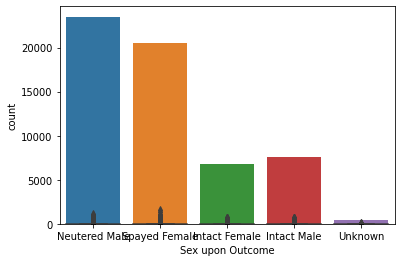

In [147]:
sns.boxplot(x = df_filtered['Sex upon Outcome'], y = df_filtered['days_in_shelter'])
sns.countplot(x = df_filtered['Sex upon Outcome'])

In [142]:
df_filtered[df_filtered['days_in_shelter'] > 30].shape

(7458, 13)

### Numerical features

## Baseline Model   
Baseline Model with RMSE and utilizing the mean as prediction

In [45]:
y_pred = df_filtered['days_in_shelter'].mean()

In [46]:
#RMSE
np.sqrt(np.mean((y_pred - df_filtered['days_in_shelter'])**2))

43.1617847268447